In [1]:
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv("C:/Users/nikhi/Desktop/python/HR_comma_sep (1).csv")

In [7]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
left = data.groupby('left')

In [11]:
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [22]:
left_count = data.groupby('left').count()
print(left_count)

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0                  11428            11428           11428   
1                   3571             3571            3571   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0                    11428               11428          11428   
1                     3571                3571           3571   

      promotion_last_5years  Departments  salary  
left                                              
0                     11428        11428   11428  
1                      3571         3571    3571  


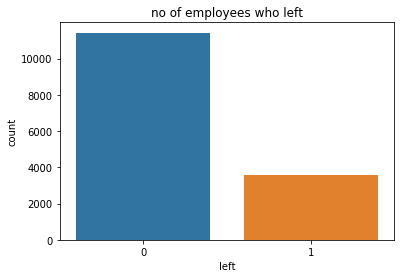

In [23]:
sns.countplot(x='left', data=data)
plt.title("no of employees who left")
plt.show()

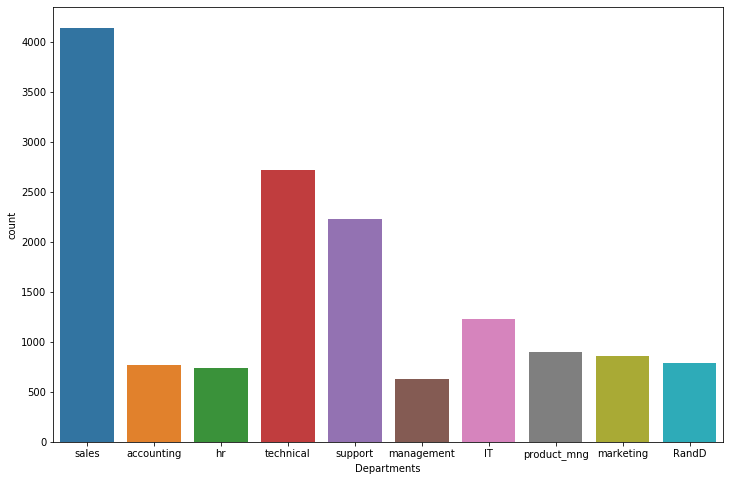

In [33]:
plt.figure(figsize=[12,8])
sns.countplot(x="Departments", data=data)

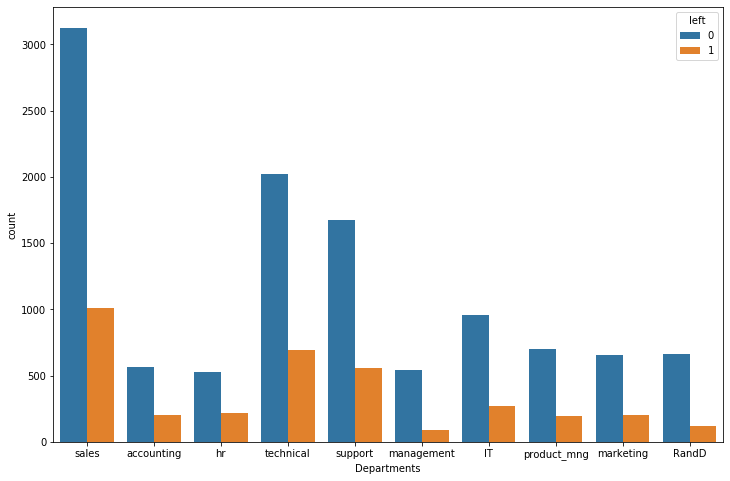

In [26]:
plt.figure(figsize=[12,8])
sns.countplot(x='Departments', hue="left", data=data)

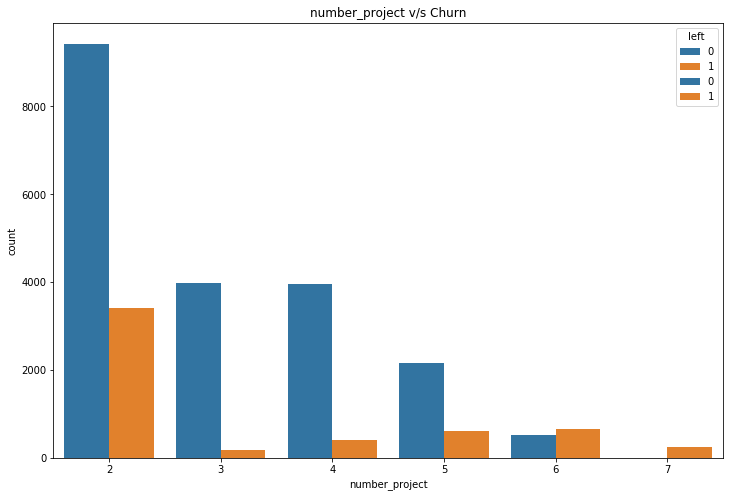

In [30]:
plt.figure(figsize=[12,8])
sns.countplot(x='Work_accident', hue="left", data=data)
sns.countplot(x='number_project',hue='left',data=data)
plt.title('number_project v/s Churn')
plt.show()

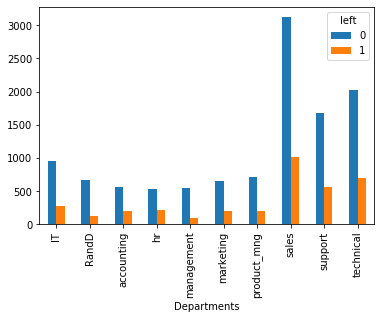

In [31]:
pd.crosstab(data.Departments, data.left).plot(kind="bar")
plt.show()

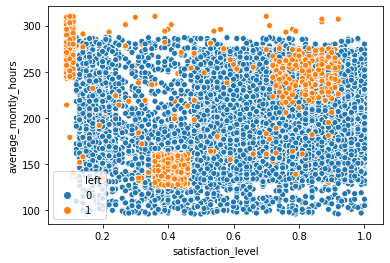

In [39]:
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', hue="left", data=data)

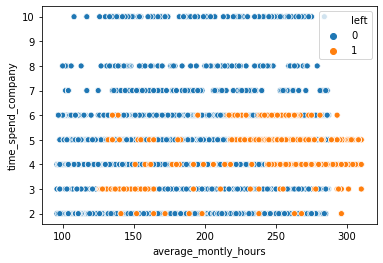

In [41]:
sns.scatterplot(x='average_montly_hours', y='time_spend_company', hue="left", data=data)

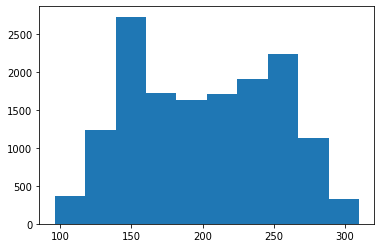

In [42]:
plt.hist(data['average_montly_hours'])
plt.show()

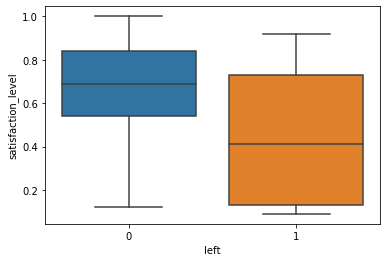

In [45]:
sns.boxplot(x="left", y="satisfaction_level", data=data)

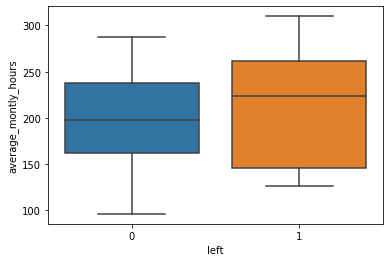

In [53]:
sns.boxplot(x="left", y ='average_montly_hours', data=data)

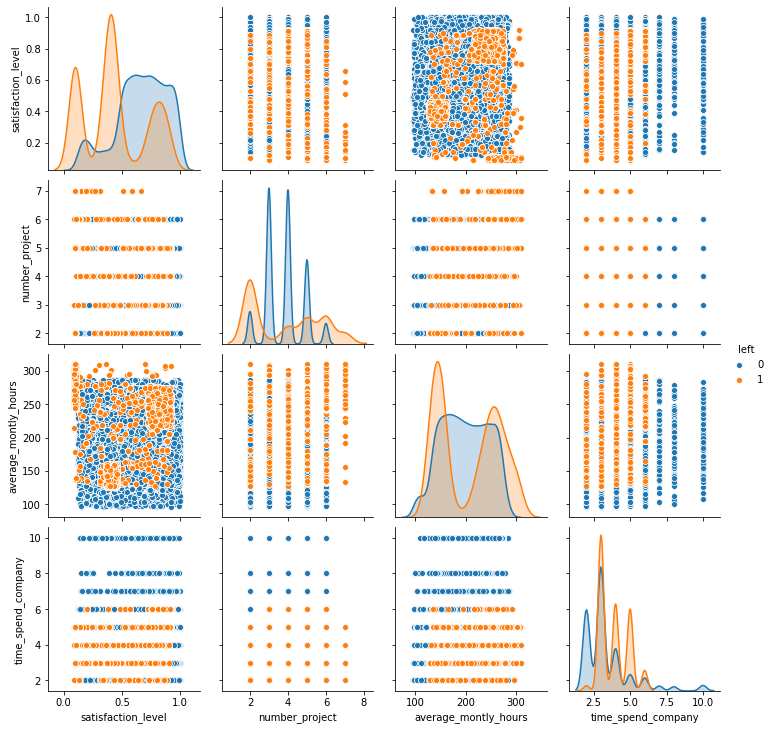

In [54]:
sns.pairplot(data, vars = ['satisfaction_level', 'number_project', 'average_montly_hours',
                           'time_spend_company' ], hue='left')

In [55]:
from sklearn import preprocessing

In [56]:
le = preprocessing.LabelEncoder()

In [57]:
data['salary']=le.fit_transform(data['salary'])

In [58]:
print(data['salary'])

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int32


In [60]:
data['Departments']=le.fit_transform(data['Departments'])

In [62]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments', 'salary']]
y=data['left']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=149)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gb = GradientBoostingClassifier()

In [67]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
y_predict = gb.predict(X_test)

In [69]:
from sklearn import metrics

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
logr = LogisticRegression()

In [77]:
logr.fit(X_train, y_train)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_predict_gb = gb.predict(X_test)
y_predict_dt = dt.predict(X_test)
y_predict_logr = logr.predict(X_test)

In [81]:
from sklearn import metrics

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_gb))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_dt))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_logr))

Accuracy: 0.9758333333333333
Accuracy: 0.9766666666666667
Accuracy: 0.7681666666666667


In [89]:
print("Precision:",metrics.precision_score(y_test, y_predict_gb))
print("Precision:",metrics.accuracy_score(y_test, y_predict_dt))
print("Precision:",metrics.accuracy_score(y_test, y_predict_logr))

Precision: 0.972871137905049
Precision: 0.9766666666666667
Precision: 0.7681666666666667


In [90]:
print("Recall:",metrics.recall_score(y_test,y_predict_gb))
print("Recall:",metrics.recall_score(y_test,y_predict_dt))
print("Recall:",metrics.recall_score(y_test,y_predict_logr))

Recall: 0.9221428571428572
Recall: 0.96
Recall: 0.26071428571428573


In [91]:
from pycaret.classification import *
exp1 = setup(data = data, target = 'left')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4878
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(14999, 10)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [93]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.986700,0.988200,0.954400,0.989300,0.971400,0.962800
1,Extra Trees Classifier,0.985300,0.992500,0.959200,0.978800,0.968900,0.959300
2,Light Gradient Boosting Machine,0.985000,0.993000,0.954800,0.981900,0.968100,0.958400
3,CatBoost Classifier,0.983500,0.992600,0.948400,0.981900,0.964800,0.954000
4,Gradient Boosting Classifier,0.977000,0.986900,0.929200,0.973200,0.950700,0.935700
5,Extreme Gradient Boosting,0.976400,0.986700,0.925600,0.974000,0.949100,0.933800
6,Decision Tree Classifier,0.975800,0.971500,0.963200,0.937300,0.949900,0.934000
7,Ada Boost Classifier,0.960700,0.981100,0.911200,0.922700,0.916900,0.891100
8,K Neighbors Classifier,0.921600,0.961700,0.866400,0.816300,0.840400,0.788500
9,Logistic Regression,0.889100,0.931000,0.792000,0.754800,0.772800,0.699600


In [95]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9895,0.9942,0.9640,0.9918,0.9777,0.9708
1,0.9867,0.9898,0.9600,0.9836,0.9717,0.9629
2,0.9838,0.9803,0.9520,0.9794,0.9655,0.9549
3,0.9800,0.9833,0.9240,0.9914,0.9565,0.9436
4,0.9857,0.9869,0.9520,0.9876,0.9695,0.9601
5,0.9886,0.9909,0.9560,0.9958,0.9755,0.9681
6,0.9867,0.9888,0.9560,0.9876,0.9715,0.9628
7,0.9895,0.9898,0.9640,0.9918,0.9777,0.9708
8,0.9914,0.9942,0.9800,0.9839,0.9820,0.9763
9,0.9847,0.9842,0.9360,1.0000,0.9669,0.9570


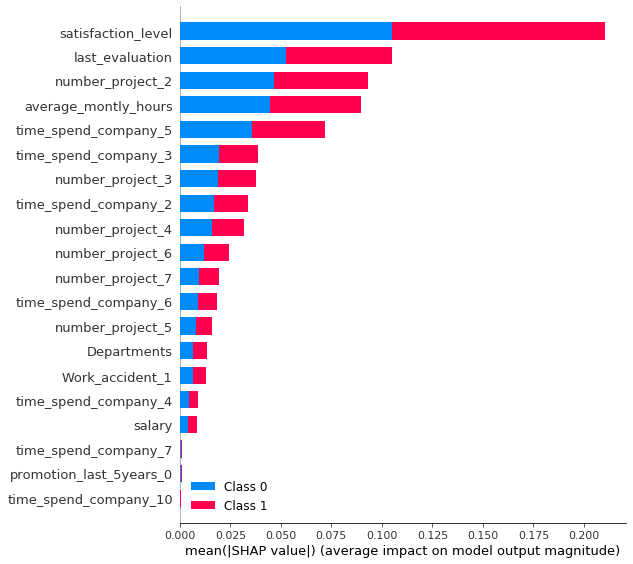

In [96]:
interpret_model(rf)

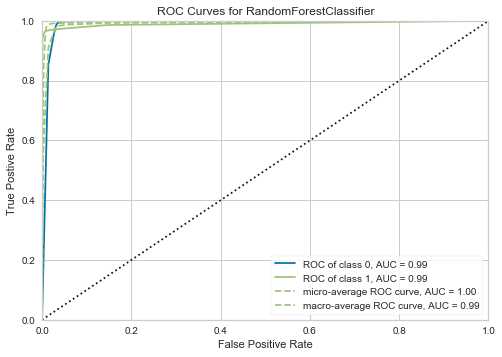

In [97]:
plot_model(rf)

In [98]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…